<a href="https://colab.research.google.com/github/BriceJurban/GChem/blob/main/Enzyme_Kinetics_Inhibition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:

# Example data for 5 different inhibitor concentrations
# Each element in the list is a tuple: (substrate_concentrations, reaction_rates)
datasets = [
    (np.array([0.1, 0.2, 0.4, 0.6, 0.8, 1.0]), np.array([0.2, 0.35, 0.65, 0.8, 0.9, 1.0])),
    (np.array([0.1, 0.2, 0.4, 0.6, 0.8, 1.0]), np.array([0.18, 0.32, 0.6, 0.75, 0.85, 0.95])),
    (np.array([0.1, 0.2, 0.4, 0.6, 0.8, 1.0]), np.array([0.15, 0.28, 0.55, 0.7, 0.8, 0.9])),
    (np.array([0.1, 0.2, 0.4, 0.6, 0.8, 1.0]), np.array([0.12, 0.25, 0.5, 0.65, 0.75, 0.85])),
    (np.array([0.1, 0.2, 0.4, 0.6, 0.8, 1.0]), np.array([0.1, 0.2, 0.45, 0.6, 0.7, 0.8])),
]

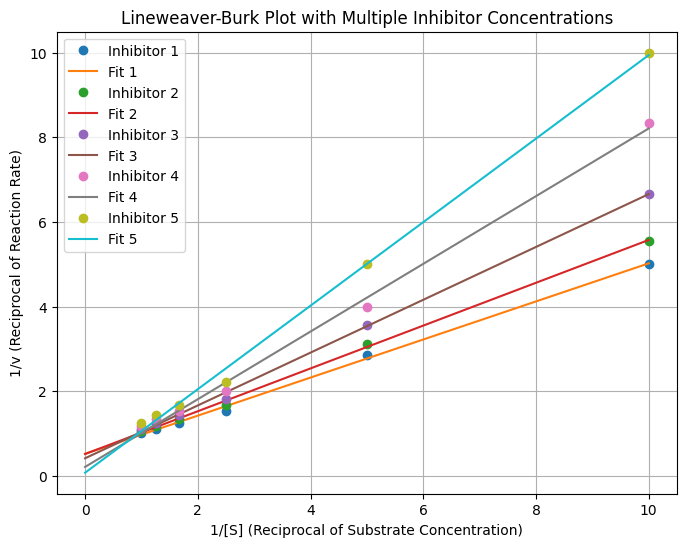

In [4]:

plt.figure(figsize=(8, 6))

for i, (substrate_concentration, reaction_rate) in enumerate(datasets):
    # Calculate reciprocals for Lineweaver-Burk plot
    reciprocal_substrate = 1 / substrate_concentration
    reciprocal_rate = 1 / reaction_rate

    # Perform linear regression on the reciprocals
    slope, intercept, r_value, p_value, std_err = linregress(reciprocal_substrate, reciprocal_rate)

    # Generate points for the best-fit line
    x_fit = np.linspace(0, max(reciprocal_substrate), 500)
    y_fit = slope * x_fit + intercept

    # Plotting
    plt.plot(reciprocal_substrate, reciprocal_rate, 'o', label=f'Inhibitor {i+1}')
    plt.plot(x_fit, y_fit, label=f'Fit {i+1}')

plt.xlabel('1/[S] (Reciprocal of Substrate Concentration)')
plt.ylabel('1/v (Reciprocal of Reaction Rate)')
plt.title('Lineweaver-Burk Plot with Multiple Inhibitor Concentrations')
plt.legend()
plt.grid(True)
plt.show()